# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
csv_file_path = "/content/drive/MyDrive/CURSOS/EBAC/Cientista de Dados/17 - Correlação, Balanceamento, Variáveis Categóricas - A Terceira etapa Pré Modelagem/Tarefa/CREDIT_SCORE_PROJETO_PARTE1.csv"

In [170]:
df = pd.read_csv(csv_file_path, delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 14, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


In [172]:
# Ajustando os dados da coluna Income antes de realizar a transformação do tipo de dados:
df["Income"] = df["Income"].str.replace(".", "", regex=False).str.replace(",", ".", regex=False)

# os dados dentro da coluna Income estavam definidos como tipo "object", ou texto, por isso realizei
# a remoção do ponto (.) que separa as casas do milhar e substitui a vírgula (,) que separa as casas decimais por ponto (.)

In [173]:
# Transformação do tipo de dado da coluna Income de object para float
df["Income"] = df["Income"].astype(float)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ KB


- O tipo de dado da coluna **Age** também poderia ser transformada de **float** para **int**, mas para isso, devemos primeiro tratar os valores nulos, ou **NaN**.

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [175]:
# Percentual de Dados Faltantes por Variável
(df.isnull().sum() / len(df)) * 100

,0
Age,20.731707
Gender,0.000000
Income,0.000000
Education,0.000000
Marital Status,0.000000
Number of Children,0.000000
Home Ownership,0.000000
Credit Score,0.000000


- Como neste caso temos uma base de dados com apenas **164 linhas**, e os dados faltantes representam **20,73%**, ou **34 linhas**, e o fato de a coluna **Age** ser muito importante para a definição de um score de crédito, optei por **substituir os dados**.

In [176]:
# Média
media = df["Age"].mean()
print(media)

37.50769230769231


In [177]:
# Mediana
mediana = df["Age"].median()
print(mediana)

36.0


In [178]:
# Moda
moda = df["Age"].mode()
print(moda)

0    25.0
1    30.0
2    35.0
Name: Age, dtype: float64


- Os dados faltantes na coluna **Age** serão substituídos pela **mediana** das idades da base de dados, pois ela é menos influenciada pelos outliers por se encontrar no centro da distribuição das idades.

In [179]:
# Substituição dos dados faltantes (NaN) em Age
df["Age"].fillna(mediana, inplace=True)

<ipython-input-179-66717bea9208>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [180]:
# Retorno dos dados faltantes (NaN) em Age
df["Age"].isnull().sum()

0

In [181]:
# Transformação do tipo de dado da coluna Age de float para int
df["Age"] = df["Age"].astype(int)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    int64  
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 10.4+ KB


**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [183]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [184]:
df["Education"].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [185]:
df["Marital Status"].unique()

array(['Single', 'Married'], dtype=object)

In [186]:
df["Home Ownership"].unique()

array(['Rented', 'Owned'], dtype=object)

In [187]:
df["Credit Score"].unique()

array(['High', 'Average', 'Low'], dtype=object)

- Não foram encontrados erros de digitação, mas podemos realizar tratamento nas variáveis para apresentá-las com letras maiúsculas.

In [188]:
df["Gender"] = df["Gender"].str.upper()
df["Gender"].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [189]:
df["Education"] = df["Education"].str.upper()
df["Education"].unique()

array(["BACHELOR'S DEGREE", "MASTER'S DEGREE", 'DOCTORATE',
       'HIGH SCHOOL DIPLOMA', "ASSOCIATE'S DEGREE"], dtype=object)

In [190]:
df["Marital Status"] = df["Marital Status"].str.upper()
df["Marital Status"].unique()

array(['SINGLE', 'MARRIED'], dtype=object)

In [191]:
df["Home Ownership"] = df["Home Ownership"].str.upper()
df["Home Ownership"].unique()

array(['RENTED', 'OWNED'], dtype=object)

In [192]:
df["Credit Score"] = df["Credit Score"].str.upper()
df["Credit Score"].unique()

array(['HIGH', 'AVERAGE', 'LOW'], dtype=object)

- Vou ajustar também os nomes das colunas para adequar aos padrões.

In [196]:
df.rename(columns={"Marital Status": "Marital_Status", "Number of Children":"Number_of_Children", "Home Ownership":"Home_Ownership", "Credit Score":"Credit_Score"}, inplace=True)

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [197]:
#seu código aqui
df.describe()

,Age,Income,Number_of_Children
count,164.000000,164.000000,164.000000
mean,37.195122,83765.243902,0.652439
std,7.586619,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


- As **médias** e **medianas** das colunas **Age** e **Income** estão bem equilibradas.

In [198]:
# A variável Number_of_Children apresenta as linhas "min", "25%" e "50%" zeradas
(df["Number_of_Children"] == 0).sum()

97

In [199]:
# Percentual de linhas
(df["Number_of_Children"] == 0).mean() * 100

59.14634146341463

- Como as linhas onde o número de filhos é 0 representa praticamente **59,15%** da base de dados, **NÃO** devemos desconsiderar essas linhas, pois representam a realidade dos cadastros contidos na base.

- Na plotagem abaixo **(boxplot CONSIDERANDO as linhas com 0 filhos)**, podemos verificar que a **mediana** é apresentada corretamente conforme a função **describe()**, que está também no limite inferior. Existem ocorrências de outliers de 3 filhos, acima do limite superior que é 2. A maioria das ocorrências ocorre ente o limite inferior e 1.

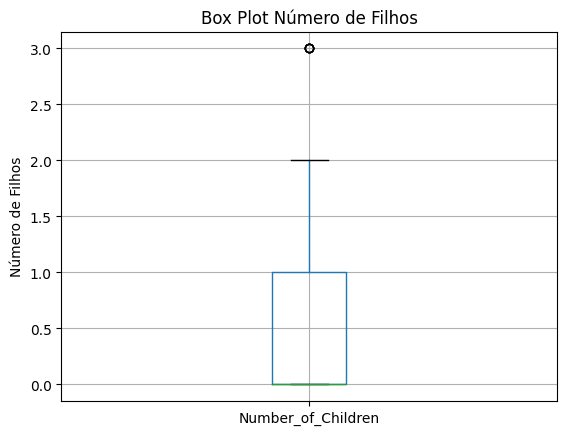

In [200]:
df.boxplot(column="Number_of_Children")
plt.title("Box Plot Número de Filhos")
plt.ylabel("Número de Filhos")
plt.show()

**A PLOTAGEM A SEGUIR NÃO É A CORRETA**, foi feita apenas para expor as diferenças que ocorrem quando desconsideramos dados importantes para a análise, o que pode comprometer o viés do projeto.

- Já nesta plotagem abaixo **(boxplot DESCONSIDERANDO as linhas com 0 filhos)**, podemos verificar que a **mediana** **NÃO** é apresentada corretamente conforme a função **describe()**, trazendo o número de filhos para 2. Não existem ocorrências de outliers, e os limites inferior e superior passaram a ser 1 e 3 respectivamente. A maioria das ocorrências se dá entre o limite inferior e a mediana.

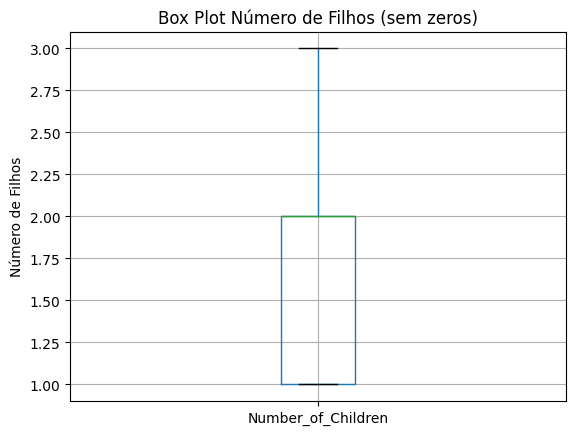

In [201]:
# ESTA NÃO É A PLOTAGEM CORRETA #
df_nao_zero = df[df["Number_of_Children"] != 0]
df_nao_zero.boxplot(column="Number_of_Children")
plt.title("Box Plot Número de Filhos (sem zeros)")
plt.ylabel("Número de Filhos")
plt.show()

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

<ipython-input-202-d59856a3a0bb>:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



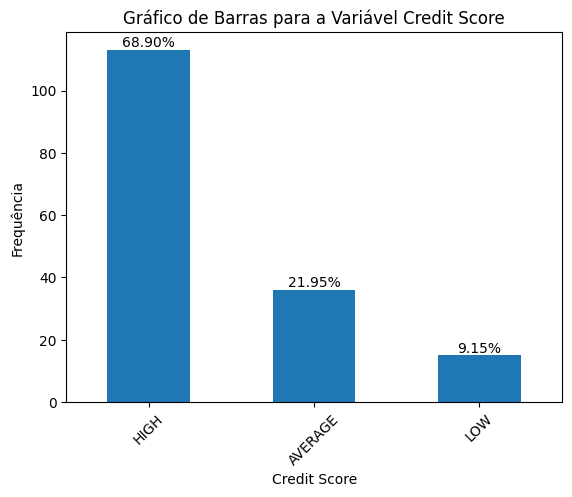

In [202]:
# Variável Credit_Score
contagem = df['Credit_Score'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Credit Score')
plt.xticks(rotation=45)
plt.xlabel('Credit Score')
plt.ylabel('Frequência')

plt.show()

- Dados de pessoas com Credit_Score **ALTO é majoritário com 68,90%**. Dados de pessoas com Credit_Score **MÉDIO** e **BAIXO** estão respectivamente com **21,95%** e **9,15%**.

<ipython-input-203-5b39fb419cd6>:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



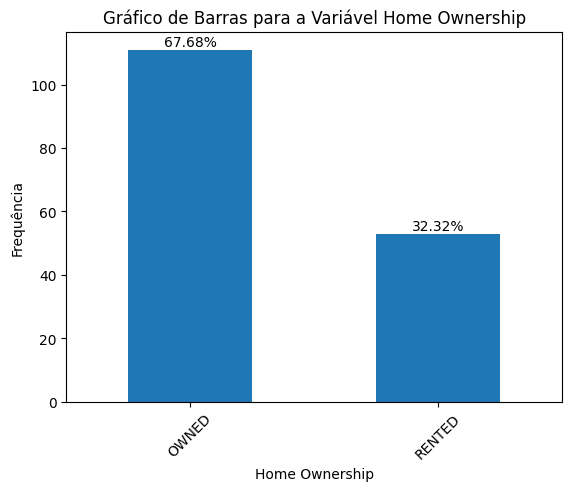

In [203]:
# Variável Home_Ownership
contagem = df['Home_Ownership'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Home Ownership')
plt.xticks(rotation=45)
plt.xlabel('Home Ownership')
plt.ylabel('Frequência')

plt.show()

- Dados de pessoas com **CASA PRÓPRIA é majoritário** em relação aos dados de pessoas com **CASA ALUGADA**.

<ipython-input-205-5e6c01d535af>:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



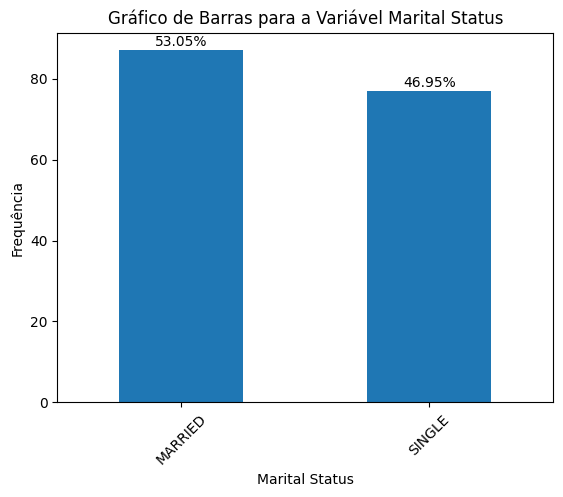

In [205]:
# Variável Marital_Status
contagem = df['Marital_Status'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Marital Status')
plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Frequência')

plt.show()

- Dados de pessoas **CASADAS** e **SOLTEIRAS** estão **balanceados**.

<ipython-input-206-697ec12562b4>:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



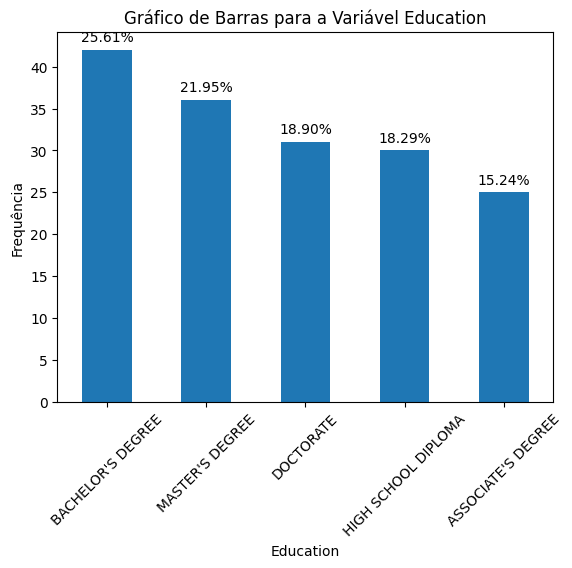

In [206]:
# Variável Education
contagem = df['Education'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Education')
plt.xticks(rotation=45)
plt.xlabel('Education')
plt.ylabel('Frequência')

plt.show()

- Dados de Education estão **moderadamente balanceados**, com destaque para **BACHELOR'S DEGREE**, com **25,61%**.

<ipython-input-207-73b022c7b61f>:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



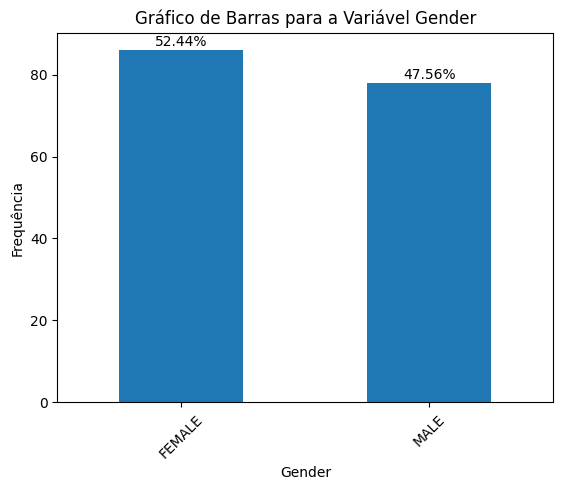

In [207]:
# Variável Gender
contagem = df['Gender'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Gender')
plt.xticks(rotation=45)
plt.xlabel('Gender')
plt.ylabel('Frequência')

plt.show()

- Dados de **HOMENS** e **MULHERES** estão **balanceados**.

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [208]:
# Variável Idade
df_renda = df['Age']
fig = px.box(df_renda, y='Age', title='Box Plot de Idade', labels={'Age': 'Idade'})
fig.show()

- Variável Age (Idade) **NÃO apresenta outliers**. Vale também lembrar que 20,73% dos registros da base original estavam com dados faltantes e foram substituídos pela mediana da coluna Age.

In [209]:
# Método IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr_idade = df[(df['Age'] <= (Q1 - 1.5 * IQR)) | (df['Age'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr_idade)

Empty DataFrame
Columns: [Age, Gender, Income, Education, Marital_Status, Number_of_Children, Home_Ownership, Credit_Score]
Index: []


- Outliers não foram identificados, mesmo utilizando os fatores 1.0 e 3.0

In [210]:
# Variável Renda
df_renda = df['Income']
fig = px.box(df_renda, y='Income', title='Box Plot da Renda', labels={'Income': 'Renda'})
fig.show()

- Variável Income (Renda) **NÃO apresenta outliers**.

In [211]:
# Método IQR
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr_renda = df[(df['Income'] <= (Q1 - 1.5 * IQR)) | (df['Income'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr_renda)

Empty DataFrame
Columns: [Age, Gender, Income, Education, Marital_Status, Number_of_Children, Home_Ownership, Credit_Score]
Index: []


- Outliers não foram identificados, mesmo utilizando os fatores 1.0 e 3.0

In [212]:
# Variável Número de Filhos
df_filhos = df['Number_of_Children']
fig = px.box(df_filhos, y='Number_of_Children', title='Box Plot do Número de Filhos', labels={'Number_of_Children': 'Número de Filhos'})
fig.show()

In [213]:
# Visualização dos registros onde número de filhos é igual a 3
df[df["Number_of_Children"] == 3]

,Age,Gender,Income,Education,Marital_Status,Number_of_Children,Home_Ownership,Credit_Score
4,45,FEMALE,100000.0,BACHELOR'S DEGREE,MARRIED,3,OWNED,HIGH
33,45,FEMALE,105000.0,BACHELOR'S DEGREE,MARRIED,3,OWNED,HIGH
65,45,FEMALE,110000.0,BACHELOR'S DEGREE,MARRIED,3,OWNED,HIGH
97,45,FEMALE,115000.0,BACHELOR'S DEGREE,MARRIED,3,OWNED,HIGH
139,45,FEMALE,105000.0,BACHELOR'S DEGREE,MARRIED,3,OWNED,HIGH


In [214]:
print("Frequência de registros onde *Número de Filhos* é igual a 3:",
      (len(df[df['Number_of_Children'] == 3]) / len(df)) * 100)

Frequência de registros onde *Número de Filhos* é igual a 3: 3.048780487804878


In [215]:
# Distribuição das categorias dentro de Number_of_Children
df['Number_of_Children'].value_counts(normalize=True) * 100

,proportion
Number_of_Children,
0,59.146341
1,19.512195
2,18.292683
3,3.048780


In [216]:
# Método IQR
Q1 = df['Number_of_Children'].quantile(0.25)
Q3 = df['Number_of_Children'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr_prole = df[(df['Number_of_Children'] <= (Q1 - 1.5 * IQR)) | (df['Number_of_Children'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr_prole)

     Age  Gender    Income          Education Marital_Status  \
4     45  FEMALE  100000.0  BACHELOR'S DEGREE        MARRIED   
33    45  FEMALE  105000.0  BACHELOR'S DEGREE        MARRIED   
65    45  FEMALE  110000.0  BACHELOR'S DEGREE        MARRIED   
97    45  FEMALE  115000.0  BACHELOR'S DEGREE        MARRIED   
139   45  FEMALE  105000.0  BACHELOR'S DEGREE        MARRIED   

     Number_of_Children Home_Ownership Credit_Score  
4                     3          OWNED         HIGH  
33                    3          OWNED         HIGH  
65                    3          OWNED         HIGH  
97                    3          OWNED         HIGH  
139                   3          OWNED         HIGH  


- A variável Number_of_Children (Número de Filhos) **apresenta outliers** para **3 filhos**. A quantidade de registros com 3 filhos representa **3,05%** (5 registros) da base total e **NÃO** deve ser considerada como erro de digitação. Também **NÃO** seria adequado tratar os dados, pois representam uma variação natural da quantidade de filhos.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [217]:
df.head(10)

,Age,Gender,Income,Education,Marital_Status,Number_of_Children,Home_Ownership,Credit_Score
0,25,FEMALE,50000.0,BACHELOR'S DEGREE,SINGLE,0,RENTED,HIGH
1,30,MALE,100000.0,MASTER'S DEGREE,MARRIED,2,OWNED,HIGH
2,35,FEMALE,75000.0,DOCTORATE,MARRIED,1,OWNED,HIGH
3,40,MALE,125000.0,HIGH SCHOOL DIPLOMA,SINGLE,0,OWNED,HIGH
4,45,FEMALE,100000.0,BACHELOR'S DEGREE,MARRIED,3,OWNED,HIGH
5,50,MALE,150000.0,MASTER'S DEGREE,MARRIED,0,OWNED,HIGH
6,26,FEMALE,40000.0,ASSOCIATE'S DEGREE,SINGLE,0,RENTED,AVERAGE
7,31,MALE,60000.0,BACHELOR'S DEGREE,SINGLE,0,RENTED,AVERAGE
8,36,FEMALE,80000.0,MASTER'S DEGREE,MARRIED,2,OWNED,HIGH
9,36,MALE,105000.0,DOCTORATE,SINGLE,0,OWNED,HIGH


In [218]:
# Existe relação entre a idade e o estado civil?
df_grouped = df.groupby(['Age', 'Marital_Status']).size().reset_index(name='count')
total_por_idade = df_grouped.groupby('Age')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_idade) * 100

fig = px.bar(df_grouped, x='Age', y='percent', color='Marital_Status', barmode='stack',
             labels={'Age': 'Idade', 'percent': 'Porcentagem', 'Marital_Status': 'Estado Civil'})

fig.update_layout(title='Relação entre Idade e Estado Civil',
                  yaxis_title='Porcentagem',
                  legend_title='Estado Civil')

- Clientes solteiros são predominantes nas idades entre 25 e 34 anos.
- A ocorrência de clientes casados é mais comum a partir dos 35 anos.
- 100% dos clientes com idade a partir de 45 anos são casados.
- Algo ocorre nas faixas etárias entre 40 e 44 anos, pois existem ocorrências totalmente compostas por clientes solteiros.

In [219]:
# Qual a relação entre o score de crédito e o nível de escolaridade?
df_grouped = df.groupby(['Credit_Score', 'Education']).size().reset_index(name='count')
total_por_score = df_grouped.groupby('Credit_Score')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_score) * 100

fig = px.bar(df_grouped, x='Credit_Score', y='percent', color='Education', barmode='stack',
             labels={'Credit_Score': 'Score de Crédito', 'percent': 'Porcentagem', 'Education': 'Educação'})

fig.update_layout(title='Relação entre Score de Crédito e Educação',
                  yaxis_title='Porcentagem',
                  legend_title='Educação')

- Clientes com score de crédito **BAIXO** têm majoritariamente **Diploma de Ensino Médio** **(66,67%)**. Clientes com **Diploma de Curso Técnico** representam **33,33%** dessa categoria.
- Clientes com **Mestrado** aparecem apenas no score de crédito **ALTO**, e representam **31,86%** do total dessa categoria. Clientes com **Doutorado** aparecem na segunda posição com **26,55%**.
- Clientes com **Bacharelado** e **Diploma de Curso Técnico** **estão balanceados** no score de crédito **MÉDIO**, ambos com **41,67%**.
- **Todas as categorias do nível de educação** aparecem representadas dentro do score de crédito **ALTO**, diferente das demais categorias de score.

In [220]:
# O idade parece influenciar no salário?
df_grouped = df.groupby(['Age', 'Income']).size().reset_index(name='count')
total_por_idade = df_grouped.groupby('Age')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_idade) * 100

fig = px.bar(df_grouped, x='Age', y='percent', color='Income', barmode='stack',
             labels={'Age': 'Idade', 'percent': 'Porcentagem', 'Income': 'Renda'})

fig.update_layout(title='Relação entre Idade e Salário',
                  yaxis_title='Porcentagem')

- Clientes com idades **de 50 a 52 anos** estão no terço superior da renda salarial **(+ 130K)**.
- Clientes de **30, 40 e 53 anos** apresentam renda um pouco inferior ao primeiro grupo.
- Algo curioso ocorre com clientes de **36 anos**, pois apresenta praticamente **todas as faixas salariais** da base, com destaque para a faixa de **85K** para **13,16%** dos clientes com essa idade.

In [221]:
# O salário parece influenciar no Score de Crédito?
df_grouped = df.groupby(['Credit_Score', 'Income']).size().reset_index(name='count')
total_por_score = df_grouped.groupby('Credit_Score')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_score) * 100

fig = px.bar(df_grouped, x='Credit_Score', y='percent', color='Income', barmode='stack',
             labels={'Credit_Score': 'Score de Crédito', 'percent': 'Porcentagem', 'Income': 'Renda'})

fig.update_layout(title='Relação entre Score de Crédito e Salário',
                  yaxis_title='Porcentagem')

- Embora os salários mais elevados de fato constem dentro da categoria de score **ALTO**, **não podemos afirmar** que seja uma regra, pois existem valores neste score que também constam nas camadas mais inferiores da categoria **MÉDIO**, como por exemplo, **50K**.

In [222]:
# Clientes com casa própria tendem a ter um score mais alto?
df_grouped = df.groupby(['Credit_Score', 'Home_Ownership']).size().reset_index(name='count')
total_por_score = df_grouped.groupby('Credit_Score')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_score) * 100

fig = px.bar(df_grouped, x='Credit_Score', y='percent', color='Home_Ownership', barmode='stack',
             labels={'Credit_Score': 'Score de Crédito', 'percent': 'Porcentagem', 'Home_Ownership': 'Moradia'})

fig.update_layout(title='Relação entre Score de Crédito e Moradia',
                  yaxis_title='Porcentagem',
                  legend_title="Moradia")

- **96,46%** dos clientes com score **ALTO** tem **casa própria**.
- **94,44%** dos clientes com score de crédito **MÉDIO** **alugam**.
- **100%** do clientes com score **BAIXO** **alugam**.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

 - O gênero dos clientes influencia no nível de escolaridade?
 - Qual a relação entre o gênero dos clientes e a renda?
 - Clientes com quantos filhos estão mais sujeitos a ter score de crédito alto?
 - O nível de escolaridade influencia no estado civil dos clientes?
 - Qual a relação entre gênero e score de crédito?
 - Clientes com renda maior têm casa própria?

In [223]:
# O gênero dos clientes influencia no nível de escolaridade?
df_grouped = df.groupby(['Education', 'Gender']).size().reset_index(name='count')
total_por_escolaridade = df_grouped.groupby('Education')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_escolaridade) * 100

fig = px.bar(df_grouped, x='Education', y='percent', color='Gender', barmode='stack',
             labels={'Education': 'Escolaridade', 'percent': 'Porcentagem', 'Gender': 'Gênero'})

fig.update_layout(title='Relação entre Gênero e Escolaridade',
                  yaxis_title='Porcentagem',
                  legend_title="Gênero")

- Clientes com **Doutorado** e **Bacharelado** são majoritariamente **MULHERES**, representando respectivamente **80,65%** e **71,43%** dos clientes com esses diplomas.
- Em clientes com **Mestrado** a situação se inverte, apresentando majoritariamente **HOMENS** com **83,33%** das ocorrências.
- Dados de clientes com diploma **Tecnólogo** estão moderadamente balancenados, com **HOMENS** representando **60%** das ocorrências, e **MULHERES**, **40%**.
- Clientes com diploma do **Ensino Médio** estão exatamente balanceados, **50%** para **MULHERES** e **HOMENS**.

In [224]:
# Qual a relação entre o gênero dos clientes e a renda?
df_grouped = df.groupby(['Gender', 'Income']).size().reset_index(name='count')
total_por_genero = df_grouped.groupby('Gender')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_genero) * 100

fig = px.bar(df_grouped, x='Gender', y='percent', color='Income', barmode='stack',
             labels={'Gender': 'Gênero', 'percent': 'Porcentagem', 'Income': 'Renda'})

fig.update_layout(title='Relação entre Gênero e Renda',
                  yaxis_title='Porcentagem')

- A renda das **MULHERES** vai de 25K a 115K, com destaque para os valores 85K e 90K, ambos com **8,14%**.
- A renda dos **HOMENS** vai de 45K a 162K, com destaque para o valor 105K, com **6,41%**.

In [225]:
# Clientes com quantos filhos estão mais sujeitos a ter score de crédito alto?
df_grouped = df.groupby(['Credit_Score', 'Number_of_Children']).size().reset_index(name='count')
total_por_score = df_grouped.groupby('Credit_Score')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_score) * 100

fig = px.bar(df_grouped, x='Credit_Score', y='percent', color='Number_of_Children', barmode='stack',
             labels={'Credit_Score': 'Score de Crédito', 'percent': 'Porcentagem', 'Number_of_Children': 'Número de Filhos'})

fig.update_layout(title='Relação entre Score de Crédito e Número de Filhos',
                  yaxis_title='Porcentagem',
                  legend_title='Número de Filhos')

- **100%** dos clientes com score de crédito **BAIXO não tem filhos**.
- **94,44%** dos cliente com score de crédito **MÉDIO não tem filhos**, e clientes com **1 e 2 filhos** representam **2,78% cada**.
- Clientes com score de crédito **ALTO** apresentam dados moderadamente balanceados para **nenhum, 1 e 2 filhos**, com respectivamente **42,48%, 27,43% e 25,66%**.
- Clientes com **3 filhos** representam **4,42%** das ocorrência de score de crédito **ALTO**, única categoria onde são encontrados.

In [226]:
# O nível de escolaridade influencia no estado civil dos clientes?
df_grouped = df.groupby(['Education', 'Marital_Status']).size().reset_index(name='count')
total_por_escolaridade = df_grouped.groupby('Education')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_escolaridade) * 100

fig = px.bar(df_grouped, x='Education', y='percent', color='Marital_Status', barmode='stack',
             labels={'Education': 'Escolaridade', 'percent': 'Porcentagem', 'Marital_Status': 'Estado Civil'})

fig.update_layout(title='Relação entre Estado Civil e Escolaridade',
                  yaxis_title='Porcentagem',
                  legend_title="Estado Civil")

- Clientes com **Doutorado** e **Bacharelado** são são majoritariamente **CASADOS**, representando respectivamente **80,65%** e **64,29%** das ocorrências.
- Dados de clientes com **Mestrado** estão balanceados, com **55,56%** das ocorrências sendo **CASADOS** e **44,44%**, **SOLTEIROS**.
- Para as categorias diploma **Tecnólogo** e **Ensino Médio**, os clientes são majoritariamente **SOLTEIROS**, representando respectivamente **80%** e **66,67%** das ocorrências.


In [227]:
# Qual a relação entre gênero e score de crédito?
df_grouped = df.groupby(['Credit_Score', 'Gender']).size().reset_index(name='count')
total_por_score = df_grouped.groupby('Credit_Score')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_score) * 100

fig = px.bar(df_grouped, x='Credit_Score', y='percent', color='Gender', barmode='stack',
             labels={'Credit_Score': 'Score de Crédito', 'percent': 'Porcentagem', 'Gender': 'Gênero'})

fig.update_layout(title='Relação entre Score de Crédito e Gênero',
                  yaxis_title='Porcentagem',
                  legend_title='Gênero')

- **100%** dos clientes com score de crédito **BAIXO** são **MULHERES**.
- Dados da categoria **MÉDIO** estão balanceados, **HOMENS** com **58,33%** e **MULHERES**, **41,67%**.
- Dados da categoria **ALTO** estão balanceados, **HOMENS** com **50,44%** e **MULHERES**, **49,56%**.

In [228]:
# Clientes com renda maior têm casa própria?
df_grouped = df.groupby(['Home_Ownership', 'Income']).size().reset_index(name='count')
total_por_home = df_grouped.groupby('Home_Ownership')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_home) * 100

fig = px.bar(df_grouped, x='Home_Ownership', y='percent', color='Income', barmode='stack',
             labels={'Home_Ownership': 'Moradia', 'percent': 'Porcentagem', 'Income': 'Renda'})

fig.update_layout(title='Relação entre Moradia e Renda',
                  yaxis_title='Porcentagem',
                  legend_title='Renda')

- Clientes com r**enda maior** tendem a ter **casa própria**, muito embora cerca de **60%** dos clientes que tem casa própria tem renda similar aos clientes que **alugam**.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [229]:
df.select_dtypes(include=["number"]).corr()

,Age,Income,Number_of_Children
Age,1.000000,0.621492,0.072432
Income,0.621492,1.000000,0.084547
Number_of_Children,0.072432,0.084547,1.000000


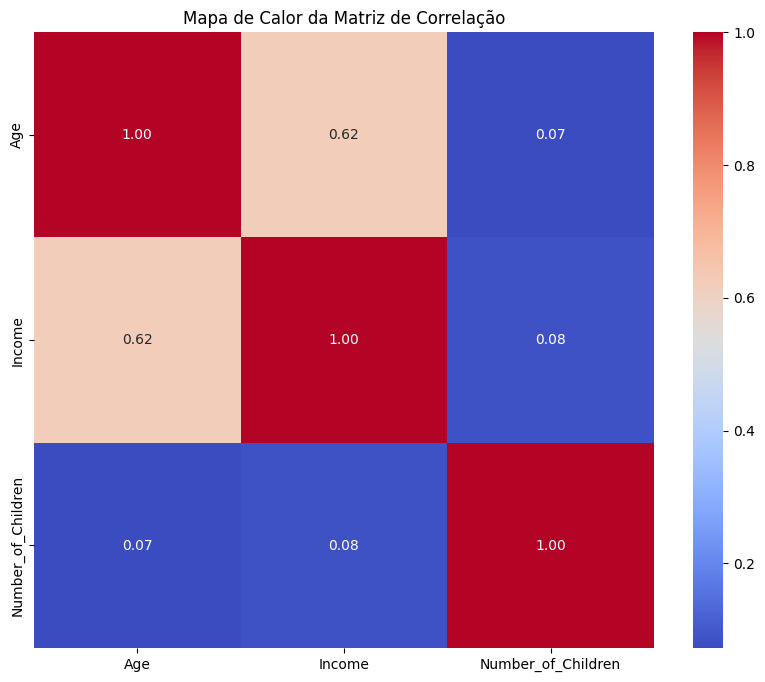

In [230]:
# Mapa de Calor da Matriz de Correlação
matriz_correlacao = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

- Localizei correlação positiva **de moderada para alta** entre **Age (Idade)** e **Income (Renda)**, apresentando **0.621492**, podendo assim ser considerada como muito **forte** quando comparada às demais correlações.
- As demais correlações também são positivas, mas são fracas por estarem muito próximas do ponto central.
- **Faz sentido sim**, pois como já foi observado em plotagens gráficas anteriores, as faixas salariais têm muita relação com a idade dos clientes, **normalmente** apresentando salários mais baixos para clientes mais jovens, e salários mais altos para clientes mais velhos. Sendo assim, pode-se dizer, que desconsiderando algumas excessões, existe um padrão nessa relação.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [231]:
# Instância Label Encoder
label_encoder = LabelEncoder()

# Aplicação de Label Encoder para as colunas "Gender", "Marital_Status" e "Home_Ownership"
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df['Status_encoded'] = label_encoder.fit_transform(df['Marital_Status'])
df['Home_encoded'] = label_encoder.fit_transform(df['Home_Ownership'])

- Apliquei **Label Econder** às colunas **Gender**, **Marital_Status** e **Home_Ownership**, pois cada uma delas apresenta apenas 2 categorias.

In [232]:
# Aplicação One-Hot para a coluna "Education"
df = pd.get_dummies(df, columns=['Education'], prefix='Education', drop_first=True)

- Optei por utilizar **One-Hot Encoder** para a coluna **Education**, pois observei que clientes de todas as categorias do nível de escolaridade constam dentro da categoria **HIGH** do **Score de Crédito**. Logo, entendo que o nível de escolaridade não pode ser considerado como uma barreira ou fator excludente para que o cliente obtenha um bom score de crédito. Não existindo assim a necessidade de aplicar pesos aos tipos de diplomas.

In [233]:
# Aplicação de Label Encoder para a coluna "Credit_Score"
df['Score_encoded'] = label_encoder.fit_transform(df['Credit_Score'])

In [234]:
# Visualização da classe para entender a ordem de aplicação do Label Encoder
print(label_encoder.classes_)

['AVERAGE' 'HIGH' 'LOW']


- Como a transformação dos dados categóricos em númericos se dá em ordem alfabética, será necessário atribuir **pesos** aos dados tranformados, sendo que **"LOW" tem o menor peso**, e **"HIGH" o maior**.

In [235]:
# Atribuindo pesos às catergorias de score de crédito
peso = {
    0: 1, # AVERAGE recebe o peso 1
    1: 2, # HIGH recebe o peso 2
    2: 0  # LOW recebe o peso 0
}

# Atribuindo os pesos à coluna
df['Score_peso'] = df['Score_encoded'].map(peso)

In [237]:
# Visualização dos valores de score encoded / peso
print(df[['Credit_Score', 'Score_encoded', 'Score_peso']])

    Credit_Score  Score_encoded  Score_peso
0           HIGH              1           2
1           HIGH              1           2
2           HIGH              1           2
3           HIGH              1           2
4           HIGH              1           2
..           ...            ...         ...
159          LOW              2           0
160      AVERAGE              0           1
161         HIGH              1           2
162         HIGH              1           2
163         HIGH              1           2

[164 rows x 3 columns]


Por que atribuí pesos às categorias de crédito?

- Como um score de crédito ALTO representa mais confiabilidade que um score de crédito MÉDIO, e um score de crédito BAIXO representa maior risco, não me pareceu correto aplicar One-Hot Encoder para que todas as categorias de score estivessem em pé de igualdade.

In [238]:
df.dtypes

,0
Age,int64
Gender,object
Income,float64
Marital_Status,object
Number_of_Children,int64
Home_Ownership,object
Credit_Score,object
Gender_encoded,int64
Status_encoded,int64
Home_encoded,int64


- As novas colunas criadas a partir do One-Hot Encoder são do tipo booleano, devem ser alteradas para o tipo númerico.

In [239]:
# Alteração do tipo de dados das variáveis booleanas para o tipo numérico
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)
print(df)

     Age  Gender    Income Marital_Status  Number_of_Children Home_Ownership  \
0     25  FEMALE   50000.0         SINGLE                   0         RENTED   
1     30    MALE  100000.0        MARRIED                   2          OWNED   
2     35  FEMALE   75000.0        MARRIED                   1          OWNED   
3     40    MALE  125000.0         SINGLE                   0          OWNED   
4     45  FEMALE  100000.0        MARRIED                   3          OWNED   
..   ...     ...       ...            ...                 ...            ...   
159   29  FEMALE   27500.0         SINGLE                   0         RENTED   
160   34    MALE   47500.0         SINGLE                   0         RENTED   
161   39  FEMALE   62500.0        MARRIED                   2          OWNED   
162   44    MALE   87500.0         SINGLE                   0          OWNED   
163   49  FEMALE   77500.0        MARRIED                   1          OWNED   

    Credit_Score  Gender_encoded  Statu

In [240]:
df.dtypes

,0
Age,int64
Gender,object
Income,float64
Marital_Status,object
Number_of_Children,int64
Home_Ownership,object
Credit_Score,object
Gender_encoded,int64
Status_encoded,int64
Home_encoded,int64


In [241]:
# Exclusão das colunas com os atributos categóricos
df = df.drop(['Gender'], axis=1)
df = df.drop(['Marital_Status'], axis=1)
df = df.drop(['Home_Ownership'], axis=1)
df = df.drop(['Credit_Score'], axis=1)
print(df)

     Age    Income  Number_of_Children  Gender_encoded  Status_encoded  \
0     25   50000.0                   0               0               1   
1     30  100000.0                   2               1               0   
2     35   75000.0                   1               0               0   
3     40  125000.0                   0               1               1   
4     45  100000.0                   3               0               0   
..   ...       ...                 ...             ...             ...   
159   29   27500.0                   0               0               1   
160   34   47500.0                   0               1               1   
161   39   62500.0                   2               0               0   
162   44   87500.0                   0               1               1   
163   49   77500.0                   1               0               0   

     Home_encoded  Education_BACHELOR'S DEGREE  Education_DOCTORATE  \
0               1                       

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            164 non-null    int64  
 1   Income                         164 non-null    float64
 2   Number_of_Children             164 non-null    int64  
 3   Gender_encoded                 164 non-null    int64  
 4   Status_encoded                 164 non-null    int64  
 5   Home_encoded                   164 non-null    int64  
 6   Education_BACHELOR'S DEGREE    164 non-null    int64  
 7   Education_DOCTORATE            164 non-null    int64  
 8   Education_HIGH SCHOOL DIPLOMA  164 non-null    int64  
 9   Education_MASTER'S DEGREE      164 non-null    int64  
 10  Score_encoded                  164 non-null    int64  
 11  Score_peso                     164 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 15.5 KB


- Colunas com tipo de dados **object** foram excluídas.

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [243]:
df.corr()

,Age,Income,Number_of_Children,Gender_encoded,Status_encoded,Home_encoded,Education_BACHELOR'S DEGREE,Education_DOCTORATE,Education_HIGH SCHOOL DIPLOMA,Education_MASTER'S DEGREE,Score_encoded,Score_peso
Age,1.000000,0.621492,0.072432,0.204661,-0.449115,-0.628042,-0.133347,0.187276,-0.010121,0.097338,0.218494,0.572247
Income,0.621492,1.000000,0.084547,0.495738,-0.471004,-0.704928,-0.079067,0.060776,-0.061150,0.344382,0.083698,0.744407
Number_of_Children,0.072432,0.084547,1.000000,-0.442139,-0.696984,-0.497129,0.310881,0.102117,-0.260999,0.092207,0.136517,0.426280
Gender_encoded,0.204661,0.495738,-0.442139,1.000000,0.278362,-0.031519,-0.223104,-0.272675,0.023108,0.379875,-0.247729,0.194962
Status_encoded,-0.449115,-0.471004,-0.696984,0.278362,1.000000,0.708374,-0.132109,-0.266960,0.186919,-0.026638,-0.205756,-0.619854
Home_encoded,-0.628042,-0.704928,-0.497129,-0.031519,0.708374,1.000000,0.072490,-0.300305,0.178899,-0.334958,-0.293384,-0.854970
Education_BACHELOR'S DEGREE,-0.133347,-0.079067,0.310881,-0.223104,-0.132109,0.072490,1.000000,-0.283269,-0.277621,-0.311165,-0.247661,0.040844
Education_DOCTORATE,0.187276,0.060776,0.102117,-0.272675,-0.266960,-0.300305,-0.283269,1.000000,-0.228435,-0.256036,0.085207,0.274656
Education_HIGH SCHOOL DIPLOMA,-0.010121,-0.061150,-0.260999,0.023108,0.186919,0.178899,-0.277621,-0.228435,1.000000,-0.250931,0.256927,-0.313328
Education_MASTER'S DEGREE,0.097338,0.344382,0.092207,0.379875,-0.026638,-0.334958,-0.311165,-0.256036,-0.250931,1.000000,0.125118,0.327994


- Age x Income **0.621492**: faz sentido, pois com a idade é comum que a renda dos indivíduos aumente.
- Age x Score_peso **0.572247**: pessoas mais velhas tendem a ter melhores score de crédito. **(Score_peso LOW = 0 AVERAGE = 1 HIGH = 2)**
- Income x Home_encoded **-0.704928**: quanto maior a renda, maior a probabilidade de o cliente ser "proprietário de imóvel". **(Home_encoded OWNED = 0 RENTED = 1)**
- Home_encoded x Score_peso **-0.854970**: conexão forte entre casa própria e  score de crédito. **(Home_encoded OWNED = 0 RENTED = 1)** **(Score_peso LOW = 0 AVERAGE = 1 HIGH = 2)**
- Home_encoded x Status_encoded **0.708374**: o estado civil influencia diretamente sobre a posse de imóvel. Neste caso, apresentando que pessoas solteiras tendem a alugar, enquanto pessoas casadas, a ter casa própria. **(Home_encoded OWNED = 0 RENTED = 1)** **(Status_encoded MARRIED = 0 SINGLE = 1)**
-Number_of_Children x Status_encoded **-0.696984**: também faz sentido, pois pessoas solteiras tendem a ter nenhum ou menos filhos que pessoas casadas. **(Status_encoded MARRIED = 0 SINGLE = 1)**

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [244]:
# Exclusão da coluna Score_encoded, pois dela deriva a coluna Score_peso, que é a coluna a ser predita
df.drop('Score_encoded', axis=1, inplace=True)

In [245]:
# Features (X) e o alvo (y)
X = df.drop('Score_peso', axis=1)  # Considerando que 'Score_peso' é a coluna a ser predita
y = df['Score_peso']

In [246]:
# Conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [247]:
X_train

,Age,Income,Number_of_Children,Gender_encoded,Status_encoded,Home_encoded,Education_BACHELOR'S DEGREE,Education_DOCTORATE,Education_HIGH SCHOOL DIPLOMA,Education_MASTER'S DEGREE
141,26,45000.0,0,0,1,1,0,0,0,0
117,29,27500.0,0,0,1,1,0,0,1,0
93,25,62500.0,0,0,1,1,1,0,0,0
133,29,68000.0,2,0,0,0,0,1,0,0
36,31,65000.0,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71,46,97500.0,1,0,0,0,0,0,1,0
106,32,57500.0,0,1,1,1,0,0,0,0
14,36,70000.0,2,0,0,0,1,0,0,0
92,36,85000.0,1,0,0,0,0,1,0,0


In [248]:
X_test

,Age,Income,Number_of_Children,Gender_encoded,Status_encoded,Home_encoded,Education_BACHELOR'S DEGREE,Education_DOCTORATE,Education_HIGH SCHOOL DIPLOMA,Education_MASTER'S DEGREE
135,25,55000.0,0,0,1,1,1,0,0,0
115,48,87500.0,1,0,0,0,0,1,0,0
131,26,55000.0,1,0,0,0,1,0,0,0
55,39,62500.0,2,0,0,0,1,0,0,0
95,35,90000.0,1,0,0,0,0,1,0,0
29,25,55000.0,0,0,1,1,1,0,0,0
157,48,82500.0,1,0,0,0,0,1,0,0
51,48,82500.0,1,0,0,0,0,1,0,0
101,36,95000.0,2,0,0,0,0,0,0,1
145,36,95000.0,1,0,0,0,0,0,1,0


In [249]:
y_train

,Score_peso
141,1
117,0
93,1
133,1
36,1
...,...
71,2
106,1
14,2
92,2


In [250]:
y_test

,Score_peso
135,1
115,2
131,1
55,2
95,2
29,1
157,2
51,2
101,2
145,2


In [252]:
print("Tamanho de X_train: ", X_train.shape)

Tamanho de X_train:  (123, 10)


In [253]:
print("Tamanho de X_test: ", X_test.shape)

Tamanho de X_test:  (41, 10)


In [255]:
print("Tamanho de y_train: ", y_train.shape)

Tamanho de y_train:  (123,)


In [256]:
print("Tamanho de y_test: ", y_test.shape)

Tamanho de y_test:  (41,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

<Axes: xlabel='Score_peso'>

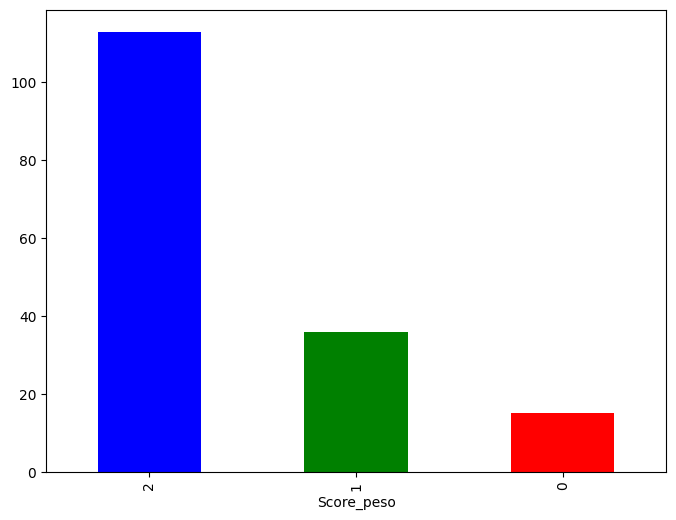

In [261]:
# Gráfico em Barras de Score_peso
# LOW = 0, AVERAGE = 1, HIGH = 2
score_counts = df['Score_peso'].value_counts()
plt.figure(figsize=(8, 6))
score_counts.plot(kind='bar', color=['blue', 'green', 'red'])

- **Dados desbalanceados**, com a maior parte das ocorrências em **Score_peso 2 (HIGH)**

In [260]:
# Percentuais de cada peso de Score
# LOW = 0, AVERAGE = 1, HIGH = 2
print((df['Score_peso'].value_counts(normalize=True) * 100))

Score_peso
2    68.902439
1    21.951220
0     9.146341
Name: proportion, dtype: float64


**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
**Se lembre que realizamos apenas para a base de treino.**

In [266]:
# Instância de SMOTE
smote = SMOTE(random_state=42)

# Aplicação do SMOTE aos dados de treino
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificação das distribuições das classes após balanceamento
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())

Distribuição das classes após o balanceamento:
Score_peso
1    84
0    84
2    84
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



In [268]:
train_balance = y_train_balanced.value_counts()
print("Balanceamento em y_train:")
print(train_balance)

Balanceamento em y_train:
Score_peso
1    84
0    84
2    84
Name: count, dtype: int64


In [269]:
y_train_balanced.to_csv('y_train_balanced.csv', index=False)

In [270]:
X_train_balanced.to_csv('X_train_balanced.csv', index=False)

In [271]:
y_test.to_csv('y_test.csv', index=False)

In [272]:
X_test.to_csv('X_test.csv', index=False)